## Multiplayer Perception

### Name: Rishikesh Dewalkar
### Date: 7th October 2024

## Step Function

In [45]:
def step(x):
    if x>0:
        return 1
    else: return 0

## Let's test this "step" function

In [46]:
step(-200)

0

In [47]:
inputs = [1, 200, -2, 0, 500]

In [48]:
for input in inputs:
    print(f'Input is {input}, and output of step function is {step(input)}')

Input is 1, and output of step function is 1
Input is 200, and output of step function is 1
Input is -2, and output of step function is 0
Input is 0, and output of step function is 0
Input is 500, and output of step function is 1


Let's improve 'step' function to process multiple item using numpy.

Let's practice numpy before we implement a new 'step' function.

In [49]:
import numpy as np
x = np.array([1, 200, 0, 500])
x>0



array([ True,  True, False,  True])

In [50]:
(x>0).astype(int)

array([1, 1, 0, 1])

In [51]:
# step_function numpy version
def step(x):
    return (x>0).astype(int)

In [52]:
step(x)

array([1, 1, 0, 1])

## Let's plot "step" function.

In [53]:
import matplotlib.pyplot as plt


In [54]:
x = np.arange(-10.0, 10.0, 0.1)
y1 = step(x)

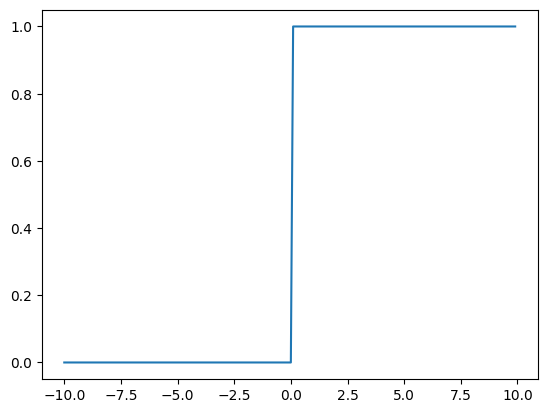

In [55]:
plt.plot(x,y1)

# Sigmoid Function

In [56]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Let's sigmoid to see if the function is properly written.

In [57]:
y = sigmoid(x)

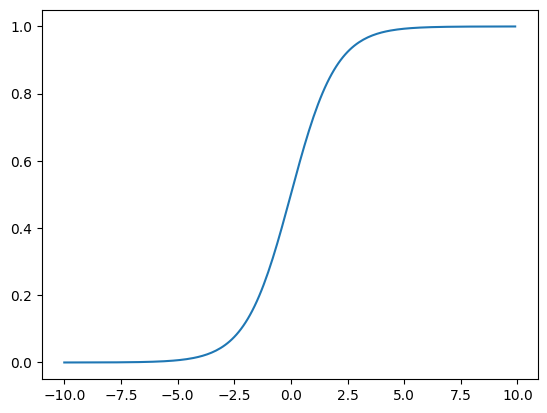

In [58]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

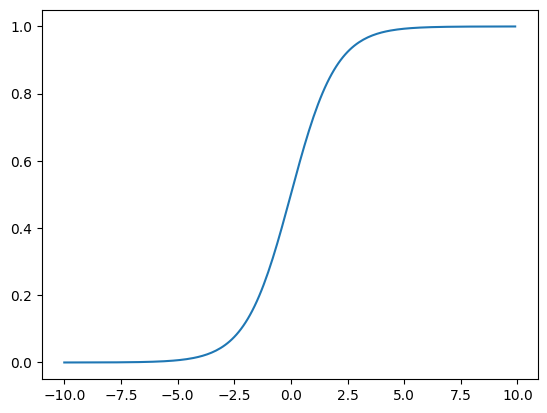

In [59]:
import matplotlib.pyplot as plt
plt.plot(x,y)

## Multi-Dimensional Array

In [60]:
import numpy as np
w = np.array([[1, 3, 5],[2, 5, 6]])

x = np.array([10, 20])


In [61]:
w

array([[1, 3, 5],
       [2, 5, 6]])

In [62]:
y =  np.dot(x, w)

In [63]:
x.shape

(2,)

In [64]:
w.shape

(2, 3)

## Multi-layer Perception
 

In [65]:
# x = np.array([7.0, 2.0])
x = np.array([1.3, 3.1415692])

In [66]:
w1 = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])

In [67]:
b1 = np.array([1, 1, 1])

In [68]:
a1 = np.dot(x, w1) + b1

In [69]:
a1

array([3.4807846 , 3.42662768, 1.70415692])

In [70]:
z1 = sigmoid(a1)

In [71]:
z1

array([0.97013606, 0.96852643, 0.84607687])

In [72]:
w2 = np.array([[0.2, 0.3,], [0.4, 0.5], [0.22, 0.1234]])


In [73]:
b2 = np.array([0.5, 0.5])

In [74]:
a2 = np.dot(z1, w2) + b2

In [75]:
a2

array([1.2675747 , 1.37970992])

In [76]:
z2 = sigmoid(a2)

In [77]:
z2

array([0.78032729, 0.79894441])

In [78]:
def identity(x):
    return x

In [79]:
w3 = np.array([[0.7, 0.1], [0.123, 0.314]])

In [80]:
b3 = np.array([0.1, 0.2])

In [81]:
a3 = np.dot(z2, w3) +b3

In [82]:
z3 = identity(a3) 

In [83]:
z3

array([0.74449927, 0.52890127])

## Make some functions to do MLP more easily

In [84]:
def init_network():
    net = {}
    #layer 1
    net['w1'] = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])
    net['b1'] = np.array([1, 1, 1])
    #layer 2
    net['w2'] = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])
    net['b2'] = np.array([0.5, 0.5])
    #layer 3 <-- output
    net['w3'] = np.array([[0.7, 0.1], [0.123, 0.314]])
    net['b3'] = np.array([0.1, 0.2])
    return net
def forward(net, x):
    w1, w2, w3 = net['w1'], net['w2'], net['w3'] 
    b1, b2, b3 = net['b1'], net['b2'], net['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3
    y = identity(a3)
    return y


In [85]:
net = init_network()
y = forward(net, np.array([7.0, 2.0]))

In [86]:
y

array([0.75050477, 0.53158747])

## Multi-layer Perception Class

In [87]:
class MultilayerPerceptron:
    def __init__(self):
        self.net={}
        pass
    
    def init_network(self):
        net = {}
        #layer 1
        net['w1'] = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])
        net['b1'] = np.array([1, 1, 1])
        #layer 2
        net['w2'] = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])
        net['b2'] = np.array([0.5, 0.5])
        #layer 3 <-- output
        net['w3'] = np.array([[0.7, 0.1], [0.123, 0.314]])
        net['b3'] = np.array([0.1, 0.2])
        self.net = net

    def forward(self, x):
        w1, w2, w3 = self.net['w1'], self.net['w2'], self.net['w3'] 
        b1, b2, b3 = self.net['b1'], self.net['b2'], self.net['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.identity(a3)

        return y
        
    def identity(self, x):
        return x
    
    def sigmoid(self, x):
        return 1/(1+ np.exp(-x))

## Let's try to use the class

In [88]:
mlp = MultilayerPerceptron()
mlp.init_network()
y = mlp.forward(np.array([7.0, 2.0]))